### Cardiac Arrhythmia Multy-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify your choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results? Do you see any significant change? Why or why not? 

Next, use data reduction method you have learned in class to reduce the size of data, and agian try above models. Do you get better results? Justify your answer. 

<font color = 'red'>Due date for full credit: April 4, 11:59 PM
    <br>
    Due date for partial credit: April 6, 11:59 PM.
    <br> No submission will be accepted after April 6. 
    <br> Please note that your term paper is also due April 6. 
    </font>

Please note that column names and description are provided in metadata word document. The last column is the target value. 

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Analyze data and address missing data if there is any.

In [2]:
# Missing value is distinguished with '?', and this data set has no columns.
df = pd.read_csv('cardiac_arrhythmia.csv',header = None,na_values = '?')
result = pd.DataFrame()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(121), int64(159)
memory usage: 988.8 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


,10,11,12,13,14
count,444.000000,430.000000,451.000000,76.000000,451.000000
mean,36.150901,48.913953,36.716186,-13.592105,74.463415
std,57.858255,29.346409,36.020725,127.220248,13.870684
min,-177.000000,-170.000000,-135.000000,-179.000000,44.000000
25%,14.000000,41.000000,12.000000,-124.500000,65.000000
50%,41.000000,56.000000,40.000000,-50.500000,72.000000
75%,63.250000,65.000000,62.000000,117.250000,81.000000
max,179.000000,176.000000,166.000000,178.000000,163.000000


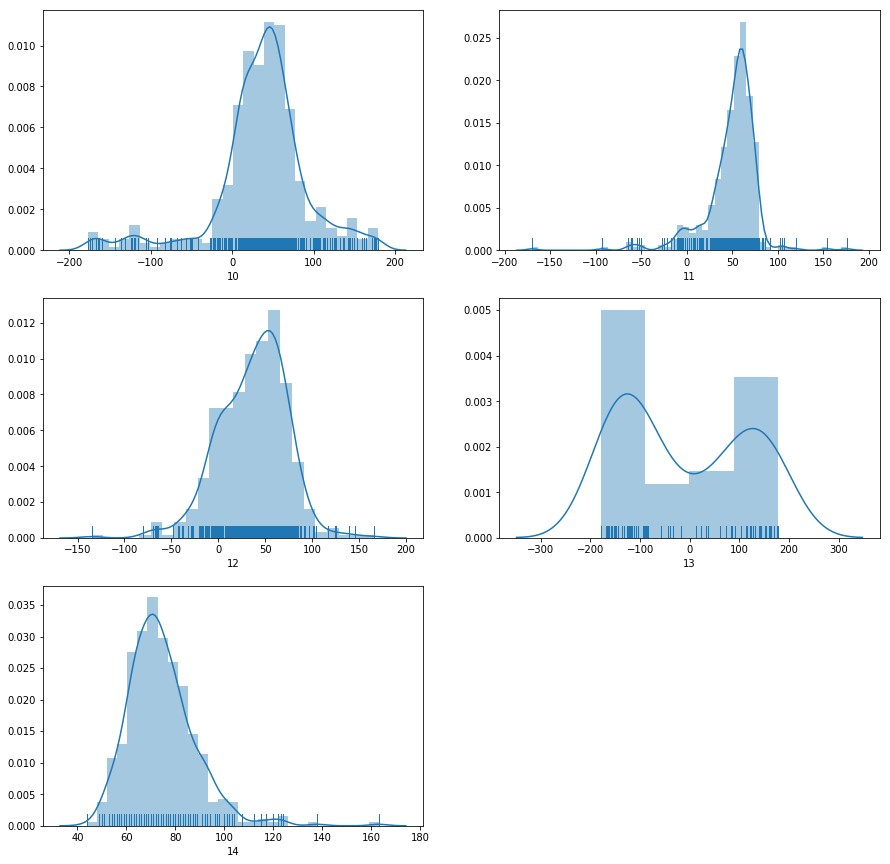

In [6]:
# Tracking missing value.
# Columns: 10 QRS, 11 T,12 P,13 QRST, 14 J, all of them are linear data.

df_missing = df.isnull().sum()[df.isnull().sum()!=0]
fig = plt.figure(figsize = (15,15))
for a,b in enumerate(df_missing.index):
    fig.add_subplot(3,2,a+1)
    sns.distplot(df[b].dropna(),rug = True)
df[[10,11,12,13,14]].describe()

There are so many missing value (83.2%) in column 13, so I decide to remove it.

For other columns, I think it okay to replace missing values using the mean along the axis.

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(axis=1) # default method: mean
data = pd.DataFrame(imputer.fit_transform(df)).drop(13, axis = 1)

### Decide aboute a good evaluation strategy and justify your choice.

For Multi-Class evaluation, I will use Confusion matrices to evaluate model.

Also, this is a imbalanced data set as we can see below:

In [8]:
df[279].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: 279, dtype: int64

### Find the best parameters for the following classification models:
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results? Do you see any significant change? Why or why not?

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop(279,axis  = 1)
y = data[279]

# orginal data
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 20)

# scaled data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### KNN

In [10]:
# the best parameters
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':list(range(1,20))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid,cv = 10).fit(X_train_org, y_train)
print('The best parameter is {}'.format(grid.best_params_))

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The best parameter is {'n_neighbors': 2}


In [11]:
# evaluation
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train_org, y_train)
from sklearn.metrics import confusion_matrix, classification_report,f1_score
#sns.heatmap(confusion_matrix(y_test, grid.predict(X_test_org)),annot=True)
print(classification_report(y_test, grid.predict(X_test_org)))
print('Train score: {0:0.2f}'.format(grid.score(X_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_test_org, y_test)))
result['knn'] = grid.score(X_train_org, y_train),grid.score(X_test_org, y_test)

             precision    recall  f1-score   support

        1.0       0.59      0.98      0.74        58
        2.0       0.29      0.18      0.22        11
        3.0       1.00      0.50      0.67         8
        4.0       0.00      0.00      0.00         3
        5.0       0.00      0.00      0.00         4
        6.0       0.00      0.00      0.00         8
        8.0       0.00      0.00      0.00         1
        9.0       1.00      1.00      1.00         2
       10.0       1.00      0.08      0.14        13
       15.0       1.00      0.50      0.67         2
       16.0       0.00      0.00      0.00         3

avg / total       0.55      0.59      0.49       113

Train score: 0.71
Test score: 0.59


d:\program files (x86)\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# Bagging & pasting
from sklearn.ensemble import BaggingClassifier

bagging_knn = BaggingClassifier(knn , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

bagging_knn = BaggingClassifier(knn , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

Train score: 0.98
Test score: 0.59
Train score: 1.00
Test score: 0.58


#### Logistic Regression

In [13]:
# the best parameters & evaluation 
# Normal vs others
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01,0.1,1,10,100],'penalty':['l1', 'l2']}
y_lr = pd.get_dummies(y.astype('int'))
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_lr[1],stratify = y_lr[1],random_state = 20)
grid = GridSearchCV(LogisticRegression(), param_grid,cv = 10).fit(X_train_lr, y_train_lr)
print('The best parameter is {}'.format(grid.best_params_))

The best parameter is {'C': 0.01, 'penalty': 'l1'}


In [14]:
#print(confusion_matrix(y_test_lr, grid.predict(X_test_lr)))
lr = LogisticRegression(C= 0.01).fit(X_train_lr, y_train_lr)
print(classification_report(y_test_lr, grid.predict(X_test_lr)))
print('Train score: {0:0.2f}'.format(grid.score(X_train_lr, y_train_lr)))
print('Test score: {0:0.2f}'.format(grid.score(X_test_lr, y_test_lr)))
result['Logistic'] = grid.score(X_train_lr, y_train_lr),grid.score(X_test_lr, y_test_lr)

             precision    recall  f1-score   support

          0       0.86      0.60      0.70        52
          1       0.73      0.92      0.81        61

avg / total       0.79      0.77      0.76       113

Train score: 0.81
Test score: 0.77


In [15]:
# Bagging & pasting

bagging_knn = BaggingClassifier(lr , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train_lr,y_train_lr)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_lr,y_train_lr)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_lr,y_test_lr)))

bagging_knn = BaggingClassifier(lr , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train_lr,y_train_lr)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_lr,y_train_lr)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_lr,y_test_lr)))

from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = lr, learning_rate = 0.5).fit(X_train_lr, y_train_lr)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train_lr, y_train_lr)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test_lr, y_test_lr)))

Train score: 0.78
Test score: 0.80
Train score: 0.76
Test score: 0.76
Train score: 0.82
Test score: 0.77


#### Linear Supprt Vector Machine

In [16]:
# the best parameters
from sklearn.svm import LinearSVC
param_grid = {'C':[0.01,0.1,1,10,100]}
grid = GridSearchCV(LinearSVC(), param_grid,cv = 10)
grid.fit(X_train, y_train)
print('The best parameter is {}'.format(grid.best_estimator_))

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The best parameter is LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [17]:
# evaluation
linear_svm = LinearSVC(C = 0.1).fit(X_train, y_train)
print(classification_report(y_test, grid.predict(X_test)))
print('Train score: {0:0.2f}'.format(grid.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_test, y_test)))
#sns.heatmap(confusion_matrix(y_test, grid.predict(X_test_org)),annot=True)
result['LinearSVM'] = grid.score(X_train, y_train),grid.score(X_test, y_test)

             precision    recall  f1-score   support

        1.0       0.69      1.00      0.82        58
        2.0       0.80      0.36      0.50        11
        3.0       1.00      0.88      0.93         8
        4.0       0.00      0.00      0.00         3
        5.0       0.00      0.00      0.00         4
        6.0       1.00      0.12      0.22         8
        8.0       0.00      0.00      0.00         1
        9.0       1.00      1.00      1.00         2
       10.0       0.85      0.85      0.85        13
       15.0       0.00      0.00      0.00         2
       16.0       0.00      0.00      0.00         3

avg / total       0.69      0.73      0.66       113

Train score: 0.82
Test score: 0.73


d:\program files (x86)\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# bagging and pasting

bagging_knn = BaggingClassifier(linear_svm , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test,y_test)))

bagging_knn = BaggingClassifier(linear_svm , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test,y_test)))

Train score: 0.56
Test score: 0.52
Train score: 0.57
Test score: 0.52


#### Kerenilzed Support Vector Machine

In [19]:
# the best parameters
from sklearn.svm import SVC
param_grid = [
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['linear']},
    {'C': [0.01,0.1,1, 10, 100], 'gamma': [0.01,0.1,1,10,100], 'kernel': ['rbf']},
    {'C': [0.01,0.1,1, 10, 100],'kernel':['poly'],'degree':[2,3,4,5,6]}
]
grid = GridSearchCV(SVC(),param_grid,cv = 10)
grid.fit(X_train, y_train)
print('The best parameter is {}'.format(grid.best_estimator_))

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The best parameter is SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [20]:
# evaluation
svm = SVC(C=1,kernel = 'linear',degree = 3 ).fit(X_train, y_train)
print(classification_report(y_test, grid.predict(X_test)))
print('Train score: {0:0.2f}'.format(grid.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_test, y_test)))
#sns.heatmap(confusion_matrix(y_test, grid.predict(X_test)),annot=True)
result['SVM'] = grid.score(X_train, y_train),grid.score(X_test, y_test)

             precision    recall  f1-score   support

        1.0       0.72      1.00      0.83        58
        2.0       0.86      0.55      0.67        11
        3.0       1.00      0.88      0.93         8
        4.0       0.00      0.00      0.00         3
        5.0       1.00      0.25      0.40         4
        6.0       1.00      0.12      0.22         8
        8.0       0.00      0.00      0.00         1
        9.0       1.00      1.00      1.00         2
       10.0       1.00      0.85      0.92        13
       15.0       0.50      0.50      0.50         2
       16.0       0.00      0.00      0.00         3

avg / total       0.77      0.77      0.72       113

Train score: 0.89
Test score: 0.77


d:\program files (x86)\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
# Bagging & pasting

bagging_knn = BaggingClassifier(svm , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test,y_test)))

bagging_knn = BaggingClassifier(svm , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test,y_test)))

Train score: 0.57
Test score: 0.51
Train score: 0.58
Test score: 0.52


#### Decision Tree

In [22]:
# the best parameters
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth':[5, 10, 20, 50, 100]}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 20), param_grid,cv = 10)
grid.fit(X_train_org, y_train)
print('The best parameter is {}'.format(grid.best_estimator_))

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The best parameter is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')


In [23]:
# evaluation
tree = DecisionTreeClassifier(random_state = 20,max_depth=5).fit(X_train_org, y_train)
print(classification_report(y_test, grid.predict(X_test_org)))
print('Train score: {0:0.2f}'.format(grid.score(X_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_test_org, y_test)))
#sns.heatmap(confusion_matrix(y_test, grid.predict(X_test_org)),annot=True)
result['Tree'] = grid.score(X_train_org, y_train),grid.score(X_test_org, y_test)

             precision    recall  f1-score   support

        1.0       0.76      0.93      0.84        58
        2.0       0.33      0.55      0.41        11
        3.0       0.75      0.38      0.50         8
        4.0       0.00      0.00      0.00         3
        5.0       0.00      0.00      0.00         4
        6.0       0.67      0.50      0.57         8
        8.0       0.00      0.00      0.00         1
        9.0       1.00      0.50      0.67         2
       10.0       0.67      0.46      0.55        13
       15.0       0.00      0.00      0.00         2
       16.0       0.00      0.00      0.00         3

avg / total       0.62      0.65      0.62       113

Train score: 0.83
Test score: 0.65


d:\program files (x86)\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# Bagging & pasting

bagging_knn = BaggingClassifier(tree , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

bagging_knn = BaggingClassifier(tree , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

adaboost_clf = AdaBoostClassifier(base_estimator = tree, learning_rate = 0.5).fit(X_train_org, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train_org, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test_org, y_test)))

Train score: 0.76
Test score: 0.65
Train score: 0.77
Test score: 0.65
Train score: 1.00
Test score: 0.66


#### Random Forest

In [25]:
# the best parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':list(range(1,11)), 'max_depth':list(range(1,10))}
grid = GridSearchCV(RandomForestClassifier(random_state=20), param_grid)
grid.fit(X_train_org, y_train)
print('The best parameter is {}'.format(grid.best_params_))

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


The best parameter is {'max_depth': 9, 'n_estimators': 9}


In [26]:
# evaluation
forest = RandomForestClassifier(max_depth=9, n_estimators=9,random_state=20).fit(X_train_org, y_train)
print(classification_report(y_test, grid.predict(X_test_org)))
print('Train score: {0:0.2f}'.format(grid.score(X_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_test_org, y_test)))
#sns.heatmap(confusion_matrix(y_test, grid.predict(X_test_org)),annot=True)
result['Forest'] = grid.score(X_train_org, y_train),grid.score(X_test_org, y_test)

             precision    recall  f1-score   support

        1.0       0.68      0.95      0.79        58
        2.0       0.42      0.45      0.43        11
        3.0       1.00      0.50      0.67         8
        4.0       0.00      0.00      0.00         3
        5.0       0.00      0.00      0.00         4
        6.0       0.50      0.12      0.20         8
        8.0       0.00      0.00      0.00         1
        9.0       1.00      1.00      1.00         2
       10.0       0.80      0.62      0.70        13
       15.0       0.00      0.00      0.00         2
       16.0       0.00      0.00      0.00         3

avg / total       0.61      0.66      0.61       113

Train score: 0.94
Test score: 0.66


d:\program files (x86)\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
# Bagging & pasting

bagging_knn = BaggingClassifier(forest , n_estimators = 100, max_features = 20, bootstrap = True).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

bagging_knn = BaggingClassifier(forest , n_estimators = 100, max_features = 20, bootstrap = False).fit(X_train_org,y_train)
print('Train score: {0:0.2f}'.format(bagging_knn.score(X_train_org,y_train)))
print('Test score: {0:0.2f}'.format(bagging_knn.score(X_test_org,y_test)))

adaboost_clf = AdaBoostClassifier(base_estimator = forest, learning_rate = 0.5).fit(X_train_org, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train_org, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test_org, y_test)))

Train score: 0.81
Test score: 0.59
Train score: 0.84
Test score: 0.63
Train score: 0.80
Test score: 0.55


#### Summary

Pasting draw a random subset of training samples s1 without replacement from the training set to train a weak learner l1, then draw second random training subset s2 without replacement from the training set and add 50 percent of the samples that were previously falsely classified/misclassified to train a weak learner l2, Find the training samples s3 in the training set on which l1 and l2 disagree to train a third weak learner l3. Finally, combine all the weak learners via majority voting.

Bagging is almost the same: choosing a random sample but with replacement. It generate n different bootstrap training sample, then train algorithm on each bootstrapped sample separately, and average the predictions at the end.

Since pasting is without replacement, each subset of the sample can be used once at most, which means that you need a big dataset for it to work. As a matter of fact, pasting was originally designed for large data-sets, when computing power is limited. Bagging, on the other hand, can use the same subsets many times, which is great for smaller sample sizes, in which it improves robustness.

These methods are designed to improve the stability and the accuracy of Machine Learning algorithms. Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier.

For knn, bagging and pasting make no difference to the result. Since it doesn't bring more information for knn.

For logistic regression, the test score is a little better after bagging.

For decision tree, random forest, linear SVM and SVM, bagging and pasting bring worse result. Mabey it put more wight on the some point that algorithm put in the wrong classes.

### Dimension Reduction

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

# with scaled data
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

# with original data
X_reduced_train_org = pca.fit_transform(X_train_org)
X_reduced_test_org = pca.transform(X_test_org)
result_pca = pd.DataFrame()

#### knn

In [29]:
param_grid = {'n_neighbors':list(range(1,20))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid,cv = 10).fit(X_reduced_train_org, y_train)
#print('The best parameter is {}'.format(grid.best_params_))
print('Train score: {0:0.2f}'.format(grid.score(X_reduced_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_reduced_test_org, y_test)))
result_pca['knn'] = grid.score(X_reduced_train_org, y_train),grid.score(X_reduced_test_org, y_test)

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Train score: 0.72
Test score: 0.61


#### Logistic Regression

In [30]:
param_grid = {'C':[0.01,0.1,1,10,100],'penalty':['l1', 'l2']}
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(pca.transform(X), y_lr[1],stratify = y_lr[1],random_state = 20)
grid = GridSearchCV(LogisticRegression(), param_grid,cv = 10).fit(X_train_lr, y_train_lr)
print('Train score: {0:0.2f}'.format(grid.score(X_train_lr, y_train_lr)))
print('Test score: {0:0.2f}'.format(grid.score(X_test_lr, y_test_lr)))
result_pca['Logistic'] = grid.score(X_train_lr, y_train_lr),grid.score(X_test_lr, y_test_lr)

Train score: 0.78
Test score: 0.79


#### Linear Supprt Vector Machine

In [31]:
param_grid = {'C':[0.01,0.1,1,10,100]}
grid = GridSearchCV(LinearSVC(), param_grid,cv = 10).fit(X_reduced_train, y_train)
print('Train score: {0:0.2f}'.format(grid.score(X_reduced_train, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_reduced_test, y_test)))
result_pca['LinearSVM'] = grid.score(X_reduced_train, y_train),grid.score(X_reduced_test, y_test)

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Train score: 0.80
Test score: 0.73


#### Kerenilzed Support Vector Machine

In [32]:
param_grid = [
    {'C': [0.01,0.1,1, 10, 100], 'kernel': ['linear']},
    {'C': [0.01,0.1,1, 10, 100], 'gamma': [0.01,0.1,1,10,100], 'kernel': ['rbf']},
    {'C': [0.01,0.1,1, 10, 100],'kernel':['poly'],'degree':[2,3,4,5,6]}
]
grid = GridSearchCV(SVC(),param_grid,cv = 10).fit(X_reduced_train, y_train)
print('Train score: {0:0.2f}'.format(grid.score(X_reduced_train, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_reduced_test, y_test)))
result_pca['SVM'] = grid.score(X_reduced_train, y_train),grid.score(X_reduced_test, y_test)

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Train score: 0.91
Test score: 0.74


#### Decision Tree

In [33]:
param_grid = {'max_depth':[5, 10, 20, 50, 100]}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 20), param_grid,cv = 10).fit(X_reduced_train_org, y_train)
print('Train score: {0:0.2f}'.format(grid.score(X_reduced_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_reduced_test_org, y_test)))
result_pca['Tree'] = grid.score(X_reduced_train_org, y_train),grid.score(X_reduced_test_org, y_test)

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Train score: 0.73
Test score: 0.53


#### Random Forest

In [34]:
param_grid = {'n_estimators':list(range(1,11)), 'max_depth':list(range(1,10))}
grid = GridSearchCV(RandomForestClassifier(random_state=20), param_grid).fit(X_reduced_train_org, y_train)
print('Train score: {0:0.2f}'.format(grid.score(X_reduced_train_org, y_train)))
print('Test score: {0:0.2f}'.format(grid.score(X_reduced_test_org, y_test)))
result_pca['Forest'] = grid.score(X_reduced_train_org, y_train),grid.score(X_reduced_test_org, y_test)

d:\program files (x86)\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Train score: 0.63
Test score: 0.57


,Train Score,Test Score,Train Score PCA,Test Score PCA
knn,0.710914,0.592920,0.716814,0.610619
Logistic,0.808260,0.769912,0.781711,0.787611
LinearSVM,0.817109,0.734513,0.802360,0.725664
SVM,0.893805,0.769912,0.911504,0.743363
Tree,0.828909,0.654867,0.731563,0.530973
Forest,0.938053,0.663717,0.625369,0.566372


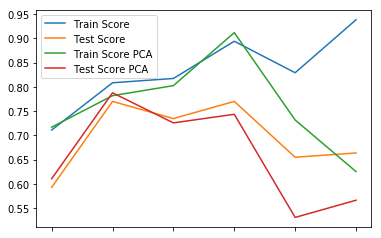

In [52]:
result.rename(index={0:'Train Score',1:'Test Score'},inplace = True)
result_pca.rename(index={0:'Train Score PCA',1:'Test Score PCA'},inplace = True)
result.T.join(result_pca.T).plot()
result.T.join(result_pca.T)

#### Summary

As for the logistic regression model, PCA brings better test score. I think the reason is in the logistic regression model, pca help model generate better, reduce overfitting by convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. Correlated independent variable might cause collinearity. And logistic regression is 'regression' even though it calculate the possibility. 

For knn, linear SVM and SVM, it seems not very useful. Maybe the reason is the algorithms only care about the distance between each point of data set, so covert the location to another axis is not helpful.

For decision tree and random forest, PCA make it worse. Maybe the reason is PCA reduce the dimension, which is critical parameters for decision tree and random forest to make decision.